In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist  # набор для работы

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
(train_imagesi, train_labels), (test_imagesi, test_labels) = fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [3]:
import matplotlib.pyplot as plt

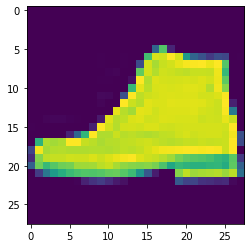

9


In [4]:
plt.imshow(train_imagesi[42,:,:])
plt.show()
print(train_labels[42])

# Задание 1. 

### Зависимость от числа нейронов в слое (для 2-хслойной сети)

Epoch 1/15
165/165 [==============================] - 1s 4ms/step - loss: 1.5373 - accuracy: 0.6623 - val_loss: 1.2846 - val_accuracy: 0.7913
Epoch 2/15
165/165 [==============================] - 0s 3ms/step - loss: 1.1205 - accuracy: 0.8153 - val_loss: 1.0132 - val_accuracy: 0.8159
Epoch 3/15
165/165 [==============================] - 0s 3ms/step - loss: 0.8967 - accuracy: 0.8355 - val_loss: 0.8278 - val_accuracy: 0.8346
Epoch 4/15
165/165 [==============================] - 0s 3ms/step - loss: 0.7411 - accuracy: 0.8493 - val_loss: 0.6987 - val_accuracy: 0.8464
Epoch 5/15
165/165 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.8590 - val_loss: 0.6098 - val_accuracy: 0.8557
Epoch 6/15
165/165 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.8671 - val_loss: 0.5695 - val_accuracy: 0.8551
Epoch 7/15
165/165 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.8716 - val_loss: 0.5212 - val_accuracy: 0.8596
Epoch 

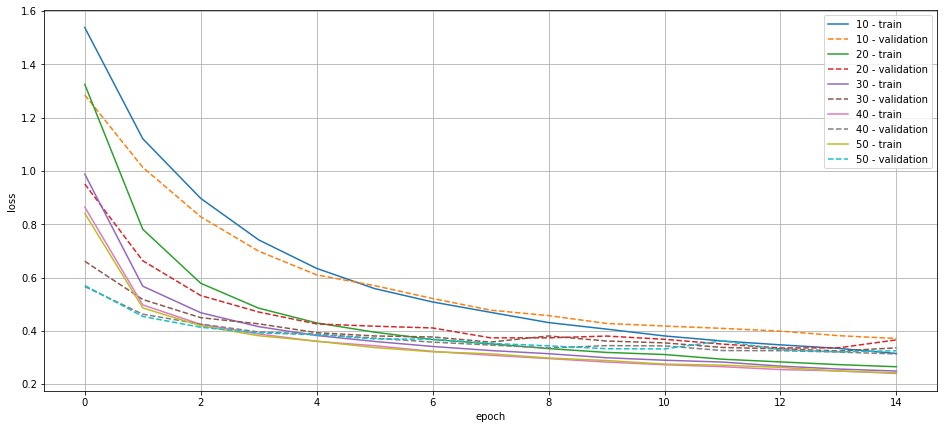

In [5]:
plt.figure(figsize=(16,7))

epochs = 15

result = []
for neuron_num in [10, 20, 30, 40, 50]:
  
  # Build the model.
  model = Sequential([ Dense(128, activation='relu', input_shape=(784,)),
                       Dense(neuron_num, activation='sigmoid'),
                       Dense(10, activation='softmax')]
                     )

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
      train_images,
      to_categorical(train_labels, 10),
      epochs=epochs,
      batch_size=256, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model of {neuron_num} neurons'
  model_accuracy = history.history['accuracy'][epochs-1]
  model_val_accuracy = history.history['val_accuracy'][epochs-1]
  result.append([model_name, model_accuracy, model_val_accuracy])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{neuron_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{neuron_num} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [6]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_accuracy', 'model_val_accuracy']).sort_values('model_val_accuracy', ascending=False)
result_table.head(5)

,model_name,model_accuracy,model_val_accuracy
3,Model of 40 neurons,0.914286,0.887222
0,Model of 10 neurons,0.902976,0.882389
2,Model of 30 neurons,0.912167,0.881667
4,Model of 50 neurons,0.913190,0.881389
1,Model of 20 neurons,0.909429,0.874000


В двуслойной модели увеличение количества нейронов в скрытом слое повышает точность обучения на тренировочной выборке. Однако наилучшая точность на валидационной выборке - при 30 нейронах в скрытом слое, что, по всей видимости, говорит о переобучении, при большем количестве нейроов

### Зависимость от числа слоев

In [7]:
neuron_num = 30
result = []

In [8]:
# 2-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256, 
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '2-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 1s 3ms/step - loss: 1.0776 - accuracy: 0.7130 - val_loss: 0.7116 - val_accuracy: 0.8073
Epoch 2/15
165/165 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.8301 - val_loss: 0.5215 - val_accuracy: 0.8373
Epoch 3/15
165/165 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.8515 - val_loss: 0.4627 - val_accuracy: 0.8473
Epoch 4/15
165/165 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8632 - val_loss: 0.4101 - val_accuracy: 0.8618
Epoch 5/15
165/165 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8697 - val_loss: 0.3949 - val_accuracy: 0.8638
Epoch 6/15
165/165 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8783 - val_loss: 0.3852 - val_accuracy: 0.8669
Epoch 7/15
165/165 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8841 - val_loss: 0.3712 - val_accuracy: 0.8714
Epoch 

In [9]:
# 3-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256, 
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '3-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 1s 4ms/step - loss: 1.6185 - accuracy: 0.6755 - val_loss: 1.1145 - val_accuracy: 0.7964
Epoch 2/15
165/165 [==============================] - 0s 3ms/step - loss: 0.8459 - accuracy: 0.8186 - val_loss: 0.6711 - val_accuracy: 0.8283
Epoch 3/15
165/165 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.8447 - val_loss: 0.5231 - val_accuracy: 0.8458
Epoch 4/15
165/165 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.8573 - val_loss: 0.4594 - val_accuracy: 0.8576
Epoch 5/15
165/165 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8684 - val_loss: 0.4435 - val_accuracy: 0.8530
Epoch 6/15
165/165 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8750 - val_loss: 0.4042 - val_accuracy: 0.8667
Epoch 7/15
165/165 [==============================] - 0s 3ms/step - loss: 0.3588 - accuracy: 0.8796 - val_loss: 0.3877 - val_accuracy: 0.8683
Epoch 

In [10]:
# 5-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256, 
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '5-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 1s 5ms/step - loss: 2.1832 - accuracy: 0.3436 - val_loss: 1.8359 - val_accuracy: 0.4592
Epoch 2/15
165/165 [==============================] - 0s 3ms/step - loss: 1.4804 - accuracy: 0.5361 - val_loss: 1.2205 - val_accuracy: 0.6514
Epoch 3/15
165/165 [==============================] - 0s 3ms/step - loss: 1.0034 - accuracy: 0.7145 - val_loss: 0.8338 - val_accuracy: 0.7578
Epoch 4/15
165/165 [==============================] - 1s 3ms/step - loss: 0.7056 - accuracy: 0.8003 - val_loss: 0.6335 - val_accuracy: 0.8334
Epoch 5/15
165/165 [==============================] - 1s 3ms/step - loss: 0.5643 - accuracy: 0.8436 - val_loss: 0.5352 - val_accuracy: 0.8508
Epoch 6/15
165/165 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.8587 - val_loss: 0.4854 - val_accuracy: 0.8572
Epoch 7/15
165/165 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.8720 - val_loss: 0.4489 - val_accuracy: 0.8636
Epoch 

In [11]:
# 10-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256, 
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '10-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 1s 4ms/step - loss: 2.1144 - accuracy: 0.2748 - val_loss: 1.7755 - val_accuracy: 0.2947
Epoch 2/15
165/165 [==============================] - 1s 3ms/step - loss: 1.5668 - accuracy: 0.4150 - val_loss: 1.3521 - val_accuracy: 0.4016
Epoch 3/15
165/165 [==============================] - 1s 3ms/step - loss: 1.2032 - accuracy: 0.5323 - val_loss: 1.0852 - val_accuracy: 0.5965
Epoch 4/15
165/165 [==============================] - 0s 3ms/step - loss: 0.9664 - accuracy: 0.6760 - val_loss: 0.8685 - val_accuracy: 0.7011
Epoch 5/15
165/165 [==============================] - 0s 3ms/step - loss: 0.7707 - accuracy: 0.7756 - val_loss: 0.7017 - val_accuracy: 0.7957
Epoch 6/15
165/165 [==============================] - 0s 3ms/step - loss: 0.6263 - accuracy: 0.8200 - val_loss: 0.6099 - val_accuracy: 0.8142
Epoch 7/15
165/165 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.8415 - val_loss: 0.5301 - val_accuracy: 0.8456
Epoch 

In [12]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_accuracy', 'model_val_accuracy', 'test_accuracy']).sort_values('model_val_accuracy', ascending=False)
result_table.head(5)

,model_name,model_accuracy,model_val_accuracy,test_accuracy
0,2-слойная сеть,0.911810,0.886278,0.8770
1,3-слойная сеть,0.913524,0.878500,0.8688
2,5-слойная сеть,0.906881,0.878056,0.8650
3,10-слойная сеть,0.897643,0.868667,0.8622


Самая высокая точность у 3х слойной модели

#Задание 2

Epoch 1/15
165/165 [==============================] - 1s 4ms/step - loss: 1.6821 - accuracy: 0.6149 - val_loss: 1.2173 - val_accuracy: 0.7638
Epoch 2/15
165/165 [==============================] - 0s 3ms/step - loss: 0.9354 - accuracy: 0.7950 - val_loss: 0.7369 - val_accuracy: 0.8205
Epoch 3/15
165/165 [==============================] - 0s 3ms/step - loss: 0.6171 - accuracy: 0.8402 - val_loss: 0.5538 - val_accuracy: 0.8398
Epoch 4/15
165/165 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.8559 - val_loss: 0.4782 - val_accuracy: 0.8483
Epoch 5/15
165/165 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.8672 - val_loss: 0.4344 - val_accuracy: 0.8588
Epoch 6/15
165/165 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.8753 - val_loss: 0.4189 - val_accuracy: 0.8572
Epoch 7/15
165/165 [==============================] - 0s 3ms/step - loss: 0.3561 - accuracy: 0.8822 - val_loss: 0.3877 - val_accuracy: 0.8674
Epoch 

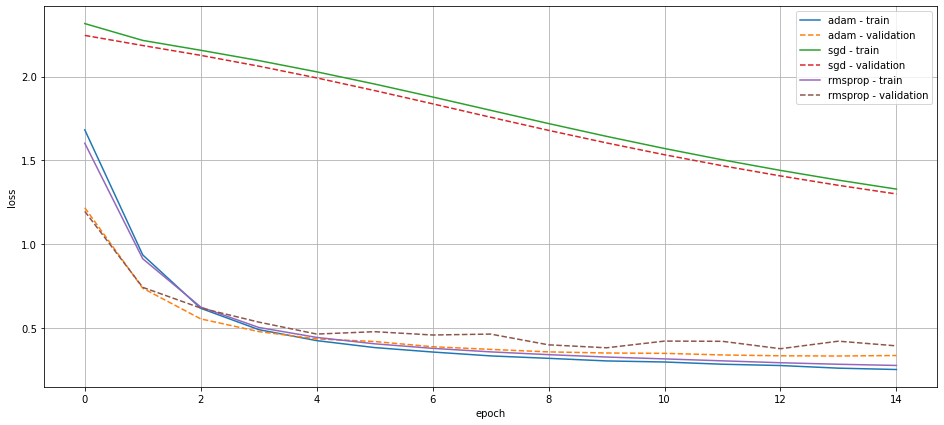

In [13]:
plt.figure(figsize=(16,7))

epochs = 15
neuron_num = 30

optimizers = ['adam', 'sgd', 'rmsprop']

result = []
for opt in optimizers:
  
  # Build the model.
  model = Sequential([ Dense(128, activation='relu', input_shape=(784,)),
                       Dense(neuron_num, activation='sigmoid'),
                       Dense(neuron_num, activation='sigmoid'),
                       Dense(10, activation='softmax')]
                     )

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
      train_images,
      to_categorical(train_labels, 10),
      epochs=epochs,
      batch_size=256, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {opt} optimizers'
  model_accuracy = history.history['accuracy'][epochs-1]
  model_val_accuracy = history.history['val_accuracy'][epochs-1]
  result.append([model_name, model_accuracy, model_val_accuracy])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{opt} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{opt} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_accuracy', 'model_val_accuracy']).sort_values('model_val_accuracy', ascending=False)
result_table.head(5)

,model_name,model_accuracy,model_val_accuracy
0,Model with adam optimizers,0.912333,0.882056
2,Model with rmsprop optimizers,0.900381,0.863000
1,Model with sgd optimizers,0.672810,0.677944


Лучший результат показал оптимизатор 'Adam'. Близко к нему, по результатам оказался оптимизатор 'RMSProp', однако из графика видно, что, в отличии от 'Adam', его фунция потерь не является монотонно убывающе на валидационной выборке

Таким образом, на качетво модели может все три параметра - число нейронов с скрытом слое, число слоев и оптимизатор. Однако не всегда простое увеличение числа нейронов и слоев ведет к повышению точности.
 Для данной задаци, наилучшие результаты оказались числе нейронов 30, 3х слоях и оптимизаторе 'Adam'

#Задание 4

In [15]:
# 3-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256, 
    validation_split=0.3
)

Epoch 1/15
165/165 [==============================] - 1s 3ms/step - loss: 1.6557 - accuracy: 0.6376 - val_loss: 1.1655 - val_accuracy: 0.7791
Epoch 2/15
165/165 [==============================] - 0s 3ms/step - loss: 0.9182 - accuracy: 0.8012 - val_loss: 0.7353 - val_accuracy: 0.8136
Epoch 3/15
165/165 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.8374 - val_loss: 0.5706 - val_accuracy: 0.8321
Epoch 4/15
165/165 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.8535 - val_loss: 0.4817 - val_accuracy: 0.8499
Epoch 5/15
165/165 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8654 - val_loss: 0.4337 - val_accuracy: 0.8580
Epoch 6/15
165/165 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8738 - val_loss: 0.4028 - val_accuracy: 0.8688
Epoch 7/15
165/165 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8795 - val_loss: 0.3810 - val_accuracy: 0.8713
Epoch 

In [16]:
test_pred = np.argmax(model.predict(test_images), axis=1)

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1000
           1       0.98      0.97      0.97      1000
           2       0.78      0.83      0.80      1000
           3       0.85      0.90      0.87      1000
           4       0.81      0.79      0.80      1000
           5       0.95      0.96      0.95      1000
           6       0.76      0.57      0.66      1000
           7       0.95      0.91      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.92      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(16,7))
    plt.imshow(cm, interpolation='nearest',  cmap=cmap)
    
    plt.grid(False)
    plt.title('confusion matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()

Confusion matrix, without normalization
[[885   2  16  28   2   2  57   0   7   1]
 [  4 968   2  22   2   0   2   0   0   0]
 [ 17   2 826  20  86   0  47   0   2   0]
 [ 32  12  10 899  25   3  13   0   4   2]
 [  0   2 100  49 794   0  52   0   3   0]
 [  0   0   0   1   0 958   0  20   1  20]
 [198   4 102  36  71   1 575   0  13   0]
 [  0   0   0   0   0  34   0 908   1  57]
 [  3   2   4   4   4   7   6   3 967   0]
 [  0   0   0   0   0   8   0  24   0 968]]


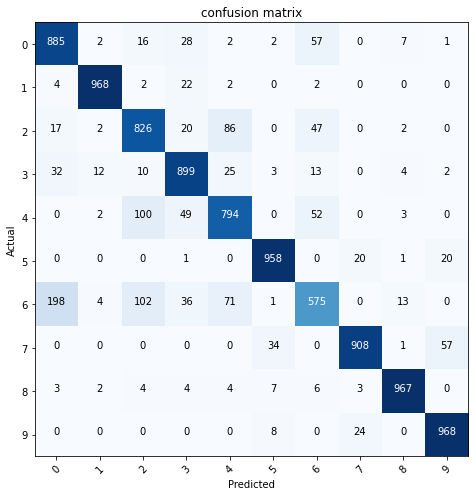

In [21]:
cm = confusion_matrix(test_labels, test_pred)
plot_confusion_matrix(cm, classes=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])